# Mémoire MAHDI DJAMA

## 1/ Paramètrage, import ...

In [1]:
#Paramétrage
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Pour le symbole "$" qui nous sera utile pour nos graphiques
import seaborn as sb # Utile pour la distribution de notre variable "Gains totaux"
from matplotlib.font_manager import FontProperties # Pour changer la police/sous-ligné les titres de graphiques
import warnings
warnings.filterwarnings('ignore') # Ignorer les avertissements 
from functools import reduce # pour nos jointures
from datetime import datetime # Pour les dates

# pour le modèle linéaire
from sklearn.model_selection import train_test_split as train
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn import linear_model as lin

In [2]:
# emplacement de travail 
path="C:/Users/Djama/Documents/Memoire/"
os.chdir(path)
path

'C:/Users/Djama/Documents/Memoire/'

In [3]:
#Vérification du contenu du répertoire :
fichiers=os.listdir(path)

fichiers

['.RData',
 '.Rhistory',
 '0326p1.jpeg',
 '0326p2.jpeg',
 '0326p3.jpeg',
 '171268890_1443859665958620_3183340567579588139_n (1).jpg',
 '171268890_1443859665958620_3183340567579588139_n.jpg',
 '172235263_1357576997945141_6211290919465710015_n.jpg',
 '172241768_1807123816134518_5545626379863208585_n.jpg',
 '172585987_303686144505467_1348577965687268977_n.jpg',
 '172739080_380873952974108_6583954788046043940_n.jpg',
 '172748462_119822636806986_4955525684203226497_n.jpg',
 '172785163_488901979190197_7057267398803897919_n.jpg',
 '172841832_812791449670811_2664045479121723100_n (1).jpg',
 '172841832_812791449670811_2664045479121723100_n.jpg',
 '172930180_197462765274243_8392501141350286204_n.jpg',
 '173108252_449525362824447_897045360588539112_n.jpg',
 '173156757_274792947611747_7191874762315730903_n (1).jpg',
 '173156757_274792947611747_7191874762315730903_n.jpg',
 '173197932_295985422090418_1401560599361793424_n.jpg',
 '173237581_215399567019164_7598738973875577491_n.jpg',
 '173246722_1114

In [4]:
# Import des données  
loc_file = r'C:/Users/Djama/Documents/Memoire/loisir.csv' # Remplacez par votre chemin d'accès aux données
df = pd.read_csv(loc_file,sep=",")
df.head(5)
# Description des variables

,COSI01,NQ,NQ1,NQ23,CC,CLASP,CLASPA,CLSEXP,CLSEXE,SEXENF,...,IECMCH,P52C2,V60C,IECDAN,P52C3,V6773C,IECDES,V8285,IECLEC,PPURE
0,3,0011087B006501,0011087B006501,NaN,1,1,4,3,NaN,NaN,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
1,3,0011087B006502,0011087B006502,NaN,1,1,4,2,NaN,2.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2,3,0011087B006503,0011087B006503,NaN,1,1,4,2,NaN,2.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3,3,0011087B006504,0011087B006504,NaN,1,1,4,2,NaN,2.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,0011087B006505,0011087B006505,NaN,1,1,4,1,NaN,1.0,...,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#Info sur les types 
info_types = pd.DataFrame(df.dtypes)
print(info_types)

              0
COSI01    int64
NQ       object
NQ1      object
NQ23     object
CC        int64
...         ...
V6773C  float64
IECDES  float64
V8285   float64
IECLEC  float64
PPURE   float64

[1582 rows x 1 columns]


Toutes les variables sont normalement catégoriques, mais python les implantes comme numériques , car elles sont codées en '1,2,3..'

In [6]:
# Avoir le nombre de colonnes et de lignes
df.info()
# 1582 colonne et 2903 lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Columns: 1582 entries, COSI01 to PPURE
dtypes: float64(1561), int64(18), object(3)
memory usage: 35.1+ MB


In [7]:
#info sur les varibales catégorielles :
list_var_cat = info_types[info_types[0]=="object"].index.tolist()

info_df_cat = pd.DataFrame()
nb_nan = []
nb_distincts =[]
for v in list_var_cat :
    nb_nan.append(df[v].isnull().sum())
    nb_distincts.append(len(set(df[v])))
    
info_df_cat["variables"] = list_var_cat
info_df_cat["Nb value distinct"] = nb_distincts
info_df_cat["Nb value missing"] = nb_nan

print(info_df_cat)

# Que 3 variables catégorielles, les autres sont sous format numérique

  variables  Nb value distinct  Nb value missing
0        NQ               2904                 0
1       NQ1               2364               541
2      NQ23               2564               853


In [8]:
# Comme celles-ci nous informent uniquement sur les codes des familles elles nous sont inutiles, nous les supprimons
df=df.drop(["NQ","NQ1","NQ23"],1)

In [9]:
# Variables numériques :
info_df_num = df.describe() #Avoir les variables numériques
nb_nan = []
nb_distincts =[]
for v in info_df_num.columns.tolist():
    nb_nan.append(df[v].isnull().sum())
    nb_distincts.append(len(set(df[v])))
    
info_df_num_2 = pd.DataFrame()
info_df_num_2 ["variables"] = info_df_num.columns.tolist()
info_df_num_2["Nb value distinct"] = nb_distincts
info_df_num_2["Nb value missing"] = nb_nan 
info_df_num_2["%Modalité_missing"] = info_df_num_2["Nb value missing"]/len(df)

print(info_df_num_2)

     variables  Nb value distinct  Nb value missing  %Modalité_missing
0       COSI01                  1                 0           0.000000
1           CC                  3                 0           0.000000
2        CLASP                  2                 0           0.000000
3       CLASPA                  9                 0           0.000000
4       CLSEXP                  4                 0           0.000000
...        ...                ...               ...                ...
1574    V6773C                892               890           0.306474
1575    IECDES               1505              1502           0.517218
1576     V8285                879               877           0.301997
1577    IECLEC               1425              1422           0.489669
1578     PPURE               2313              2308           0.794766

[1579 rows x 4 columns]


D'après les résultats ci- dessus, la base possède beaucoup de modalités avec des données manquantes. De plus, ces variables sont normalement "catégoriques" mais comme elles sont sous format numérique

In [10]:
info_df_num_2=info_df_num_2.sort_values(by=['%Modalité_missing'])
info_df_num_2.head(n=20)

,variables,Nb value distinct,Nb value missing,%Modalité_missing
0,COSI01,1,0,0.000000
28,MONO2,4,0,0.000000
1025,V76PP,5,0,0.000000
980,V70PP,5,0,0.000000
935,V64PP,5,0,0.000000
880,V57P,5,0,0.000000
514,SITFAB,6,0,0.000000
515,MONOE,3,0,0.000000
27,MONO,3,0,0.000000
9,TYPEC,4,0,0.000000


Seuelement 18 variables sans données manquantes

In [11]:
info_df_num_2["%Modalité_missing"].mean()

0.5221138060319944

In [12]:
round(df['P21'].isnull().mean()*100,2) 
# 54% de données manquantes dans notre dataframe pour la variable cible

54.89

In [13]:
# Nous prenons un seuil de 60% de données manquantes pour la conservation de nos variables
info_df_num_2["enlever"]=np.where(info_df_num_2["%Modalité_missing"]>=0.6,info_df_num_2["variables"],float('nan'))




In [14]:
# Verification
info_df_num_2.tail()

,variables,Nb value distinct,Nb value missing,%Modalité_missing,enlever
441,P87F_O8,2904,2903,0.999656,P87F_O8
970,V69RM_O6,2904,2903,0.999656,V69RM_O6
972,V69RM_O8,2904,2904,1.000000,V69RM_O8
438,P87F_O5,2904,2904,1.000000,P87F_O5
963,V69R_O8,2904,2904,1.000000,V69R_O8


In [15]:
# Creer une liste avec les noms de variables à garder
liste=info_df_num_2["enlever"].tolist()

In [16]:
# Enlever tous les NaN de la liste
liste2=[x for x in liste if x == x]

In [17]:
# Garder toutes les colonnes qui se trouvent dans la liste créé.
df = df.drop(columns=liste2)

In [18]:
df.info()

# Il ne reste plus que 1062 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Columns: 1062 entries, COSI01 to IECLEC
dtypes: float64(1044), int64(18)
memory usage: 23.5 MB


## 2/ Traitement sur la base

In [19]:
# Utilisation de l'algorithme du KNN pour remplacer les données manquantes

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    #Encoding dict &amp; Removing nan    
    #mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    # mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    # Scaler
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    #Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df

In [20]:
df1=imputation(df,df.columns)

In [21]:
# Testons
df1.isna().sum()
# Plus aucune donnée manquante !

COSI01    0
CC        0
CLASP     0
CLASPA    0
CLSEXP    0
         ..
P52C3     0
V6773C    0
IECDES    0
V8285     0
IECLEC    0
Length: 1062, dtype: int64

## Analyse de notre variable cible avec les variables explicatives

### 1/ création de la variable cible hobby sportif

In [22]:
# Visualisation des modalités
x=pd.DataFrame(df1["P21"].value_counts())
y=pd.DataFrame(df["P21"].value_counts())
x=x.rename(columns={"P21":"Avec Algorithme"})
y=y.rename(columns={"P21":"Sans Algorithme"})
x

,Avec Algorithme
17.0,338
34.0,338
16.0,196
24.0,181
22.0,178
39.0,166
41.0,160
9.0,152
5.0,151
10.0,139


In [23]:
# définir la variable cible
# Activité sportive chez les enfants
# modalités 17 20 26 32 33 34 35 39 42 44 45 46 47 56
target = "P21"
Sport=[17,20,26,32,33,34,35,39,42,44,45,46,47,56]
import numpy as np
df1["P21Dummy"]=  np.where(np.isin(df[target],Sport),1,0)


In [24]:
df1["P21Dummy"].value_counts()
# 752 Enfants avec un hobbie sportif

0    2152
1     752
Name: P21Dummy, dtype: int64

In [25]:
# Enlever la variable P21
df1=df1.drop(["P21"],1)

% Variable cible : 0.25895316804407714


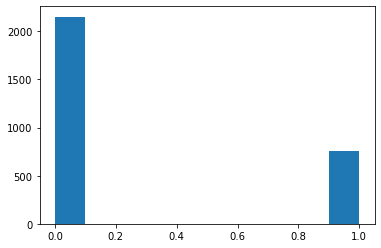

In [26]:
import matplotlib.pyplot as plt    
plt.hist(df1["P21Dummy"])
print("% Variable cible : " + str(df1["P21Dummy"].mean()))

La variable cible est désiquilibrée : 25,9 % d'enfants pratique une activité sportive.

Nous devons respecter cette répartition dans le jeu d'apprentissage et de test.

--> utilisation de la notion d'échantillon stratifié : pour avoir la même répartion dans les 2 jeux de données

## Relation entre la variable expliquée et les var explicatives

In [27]:
# Test de khi2 pour avoir la relation entre la variable expliqué et les explicatives
liste_var=df1.columns.tolist()
target="P21Dummy"
listekhi2=[]
# Variables catégortielles test du Chi 2:
import scipy.stats as st
for v in liste_var:
    if v!=target:
        cont = df1[[v, target]].pivot_table(index=v, columns=target, aggfunc=len).fillna(0).copy().astype(int) # Création de la table de contingence
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
        print(v + ": p-value test chi 2 = " + str(st_p))
    if st_p>0.05 :
        listekhi2.append(v)

COSI01: p-value test chi 2 = 1.0
CC: p-value test chi 2 = 3.5492025357871655e-51
CLASP: p-value test chi 2 = 0.14869533087627174
CLASPA: p-value test chi 2 = 0.13086294485637961
CLSEXP: p-value test chi 2 = 1.4389596384741924e-16
CLSEXE: p-value test chi 2 = 1.0074326444572268e-16
SEXENF: p-value test chi 2 = 2.7349837765735576e-18
VV: p-value test chi 2 = 1.6018737250523178e-52
VV2: p-value test chi 2 = 1.4519598813713946e-51
TYPEC: p-value test chi 2 = 0.0052615521424739155
P: p-value test chi 2 = 1.0
E: p-value test chi 2 = 1.0
V: p-value test chi 2 = 1.0
P1: p-value test chi 2 = 0.007519627381616157
SEXREP: p-value test chi 2 = 0.010402235970206687
P2: p-value test chi 2 = 0.1134873517862141
SITFAM: p-value test chi 2 = 1.5782965088550335e-41
MONO: p-value test chi 2 = 6.691620187653037e-44
MONO2: p-value test chi 2 = 3.606694133617975e-43
P4: p-value test chi 2 = 6.033810086037865e-17
P4R: p-value test chi 2 = 0.003545668235099352
P5: p-value test chi 2 = 7.579209304688282e-05
P5R

In [28]:
len(listekhi2)
# 588 variables sans effet sur notre variable cible

588

In [29]:
y=df1["P21Dummy"]
df1 = df1.drop(columns=listekhi2)

In [30]:
df1.info()

# Il ne reste plus que 474 colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Columns: 474 entries, CC to V6773C
dtypes: float64(462), int64(12)
memory usage: 10.5 MB


SEXENF,1.0,2.0
P21Dummy,,
0,54.600372,45.399628
1,36.037234,63.962766


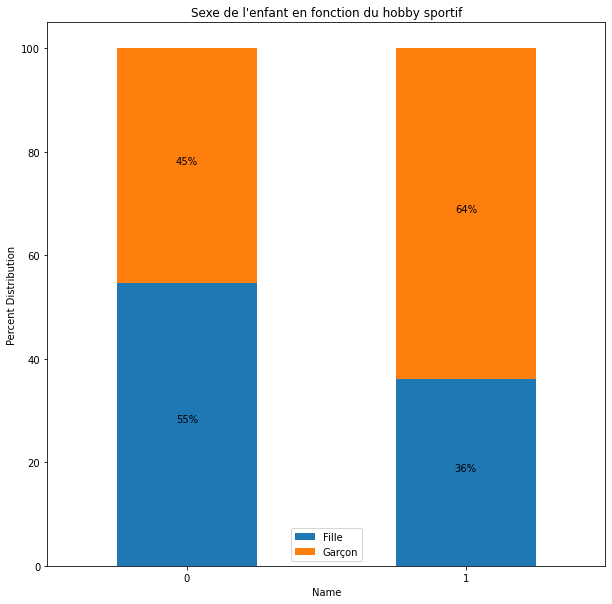

In [31]:
pal = ["royalblue", "dodgerblue", "lightskyblue", "lightblue"]
ax= pd.crosstab(y, df1['SEXENF']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.title("Sexe de l'enfant en fonction du hobby sportif")
plt.xlabel('Name')
plt.legend(['Fille', 'Garçon'])
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

P37H,1.0,2.0,3.0
P21Dummy,,,
0,32.760223,29.275093,37.964684
1,34.973404,40.957447,24.069149


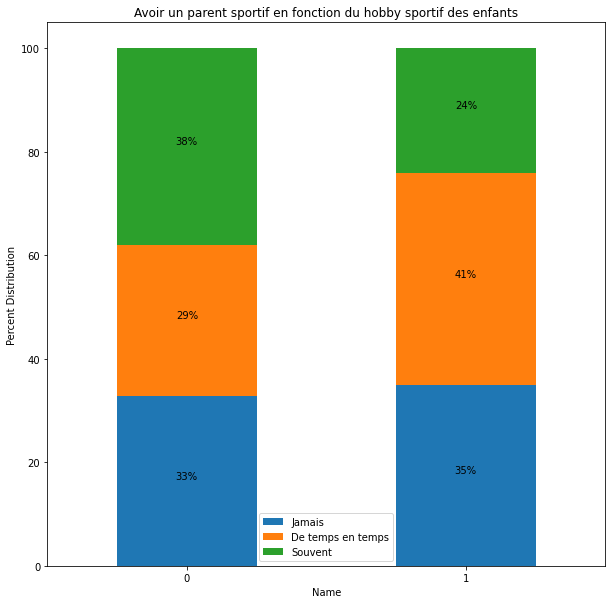

In [32]:
pal = ["royalblue", "dodgerblue", "lightskyblue", "lightblue"]
ax= pd.crosstab(y, df1['P37H']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.title("Avoir un parent sportif en fonction du hobby sportif des enfants")
plt.xlabel('Name')
plt.legend(["Jamais","De temps en temps","Souvent"])
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

MONO,1,2,3
P21Dummy,,,
0,65.055762,8.039033,26.905204
1,85.106383,12.101064,2.792553


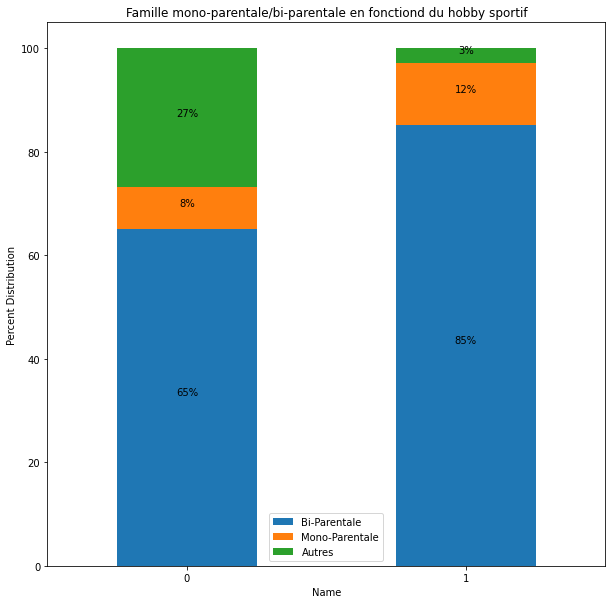

In [33]:
pal = ["royalblue", "dodgerblue", "lightskyblue", "lightblue"]
ax= pd.crosstab(y, df1['MONO']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0)
display(ax)

plt.title("Famille mono-parentale/bi-parentale en fonctiond du hobby sportif")
plt.xlabel('Name')
plt.legend(["Bi-Parentale","Mono-Parentale","Autres"])
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

# Modélisation

In [34]:
# transformation en dummies toutes les variables explicatives pour la modélisation
X=df1.astype(str)
X=pd.get_dummies(X,drop_first=True)

In [35]:
X

,CC_2,CC_3,CLSEXP_2,CLSEXP_21,CLSEXP_3,CLSEXE_12.0,CLSEXE_15.0,CLSEXE_2.0,CLSEXE_3.0,CLSEXE_6.0,...,IECJVI_0.0,IECJVI_1.0,IECJVI_2.0,IECJVI_3.0,P52C_2.0,V53C_2.0,P52C2_2.0,V60C_2.0,P52C3_2.0,V6773C_2.0
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,1,1,1,1,1,1
1,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,1,1,1,1
2,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,1,1,1,1
3,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
2900,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,1,1,1,1,1
2901,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,1,1,1,0
2902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [36]:
#Création d'un jeu de données d'apprentissage, de validation et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, stratify=y)    


In [38]:
# Utilisation du package SelectFromModel pour selectionner les variables avec plus de 0.02 d'importance avec la random forest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
sfm = SelectFromModel(clf, threshold=0.002)

# Train le selector
sfm.fit(X_train, y_train)

# Affichage des variables les plus importantes
print(len(sfm.get_support(indices=True)), "features selected")
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index], clf.feature_importances_[feature_list_index])
# 35 variables dans le modèle final

35 features selected
CC_2 0.006109037443106349
CLSEXE_2.0 0.0022397254014673534
SEXENF_2.0 0.0021204905329510336
VV_2 0.009490499362868204
VV_3 0.0032402535025052243
VV2_2 0.006893520103321675
SITFAM_6 0.004735765871146229
MONO_3 0.007937607645259448
MONO2_4 0.0034864750753132987
P20_2.0 0.05606926907286999
P22F_2.0 0.0023057222944421942
P35_3.0 0.005326793617283644
P35_4.0 0.00969727483129638
P35R_2.0 0.01044974223335774
P35A_2.0 0.013257126965810176
P36_10.0 0.005002538954022545
P36A_10.0 0.004769387608638193
P36A_7.0 0.0026179491429680008
P37H_3.0 0.0024080181387205048
P41_3.0 0.002359566645622056
P51_2.0 0.006906077158096046
P512_2.0 0.006934255522779571
P62_O2_2.0 0.018304641229447405
P62_O3_2.0 0.004880979051464572
V2_2.0 0.0023283052215162066
V9R_O1_18.0 0.002083996326374373
V32_3.0 0.0021939727371850016
V32R_2.0 0.005633300334461154
V37_3.0 0.002251161936190639
V52_2.0 0.0029761649822651094
V120_O3_2.0 0.0037675481042142773
I2H_1.0 0.0026359738600671644
ILIPR_3.0 0.002447060505

In [39]:
X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)

## Modélisation

### 1 ) Arbre de décision

In [40]:
from sklearn.tree import DecisionTreeClassifier
import random
from skopt import BayesSearchCV
from skopt.space import Real, Integer,Categorical
# Création du dictionnaire des indicateurs que nous souhaitons testés pour la méthode Random ou GridSearch
param_dict = {
    'criterion': ['gini', 'entropy'], # Le critère de split des arbres
    'splitter': ['best','random'],    # Est-ce que l'on teste un échantillon de variable (random) 
                                        #ou toutes les variables (best) à chaque neoud
    'max_depth': [3,4,10,15,20,25,30,35,100],  # Profondeur maximum de l'arbre
    'min_samples_split': [2,4,6,8,10,12,14,16], # # Nombre d'observations mimnimum pour créer un split
    'min_samples_leaf': [1,5,10,15,20,25,30,35,100],     # Nombre d'observations minimum dans une feuille
    'min_weight_fraction_leaf': [0,0.01], # Proportion minimum des observations dans une feuille
    'max_features': ['log2',"sqrt"]}

#Création  du dictionnaire de recherche pour la méthode d'optimisation bayesienne


clf = DecisionTreeClassifier() 
# Définition des paramètres avec des lois de probabilités
param_dict_bayes = {
    'criterion': Categorical(['gini', 'entropy']), 
    'splitter': Categorical(['best','random']),
    'max_depth': Integer(3,100),
    'min_samples_split': Integer(2,100),
    'min_samples_leaf': Integer(1,20),
    'min_weight_fraction_leaf': Real(0,0.5, prior='uniform')}

# Grilles des paramètres

NB_ITER = 5 # Nombre d'itéations maximum pour le Random et l'optimisation Bayesienne 

#Tirage aléatoire d'une combinaison de paramètre

from sklearn.model_selection import cross_validate
# Définition d'une fonction 
def random_parameter(clf,param_dict,n_iter,X_train,y_train,nb_cv) :
    res = pd.DataFrame()
    compt = 0
    num_iter = []
    auc=[]
    param = []
    while compt <n_iter :
        compt = compt +1
        params = {key: random.sample(value, 1)[0] for key, value in param_dict.items()}
        clf.set_params(**params)
        scores = cross_validate(clf, X_train, y_train, cv=5,
                        scoring = ['roc_auc'])
        num_iter.append(compt)
        param.append(params)
        auc.append(scores['test_roc_auc'].mean())
    
    res["Num_ITER"] = num_iter
    res["Param"] = param
    res["Auc"] = auc
    
    return res
  
 

from timeit import default_timer as timer
start = timer()  
Random_Res_Tree = random_parameter(DecisionTreeClassifier() ,param_dict,NB_ITER,X_train,y_train,5)
delais = timer()- start
print(" #### RECHERCHE ALEATOIRE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
Random_Res_Tree.sort_values('Auc', ascending = False, inplace = True)
Random_Res_Tree.head()
# Récupère les paramètres qui nous intéresse :
best_param_random_search = list(Random_Res_Tree["Param"])[0]
print("\n Paramètres recherche aléatoire : ")
print(best_param_random_search)

print("\n Résultats recherche aléatoire : " + str(Random_Res_Tree['Auc'].max()))


####  choix des paramètres : utilisation du  Grid Search


from sklearn.model_selection import GridSearchCV
 
start = timer()  
Grid_Search = GridSearchCV(DecisionTreeClassifier(),param_dict,scoring='roc_auc',cv=5)
Grid_Search.fit(X_train,y_train)
delais = timer()- start
print(" #### RECHERCHE GRID SEARCH #### ")
print(" \n Durée de recherche en minute :")
print(delais/60)
print("\n Paramètres grid search : ")
best_param_gid_search = Grid_Search.best_params_
print(best_param_gid_search)
best_score_grid_search = Grid_Search.best_score_
print("\n Résultats grid search  : " + str(best_score_grid_search))



opt = BayesSearchCV(clf,param_dict_bayes , n_iter=NB_ITER,cv=5,scoring = 'roc_auc')
start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start

print(" #### RECHERCHE OPTIMISATION #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres grid search : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats grid search  : " + str(best_score_opti_bayes))

 #### RECHERCHE ALEATOIRE #### 
 
 Durée de recherche en seconde :
0.055562400000781054

 Paramètres recherche aléatoire : 
{'criterion': 'gini', 'splitter': 'best', 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.01, 'max_features': 'log2'}

 Résultats recherche aléatoire : 0.9388897920201298
 #### RECHERCHE GRID SEARCH #### 
 
 Durée de recherche en minute :
1.940024089999982

 Paramètres grid search : 
{'criterion': 'gini', 'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 15, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0, 'splitter': 'random'}

 Résultats grid search  : 0.9515107036569876
 #### RECHERCHE OPTIMISATION #### 
 
 Durée de recherche en seconde :
0.1133821999974316

 Paramètres grid search : 
OrderedDict([('criterion', 'gini'), ('max_depth', 4), ('min_samples_leaf', 18), ('min_samples_split', 18), ('min_weight_fraction_leaf', 0.0068605919589463955), ('splitter', 'random')])

 Résultats grid search  : 0.943

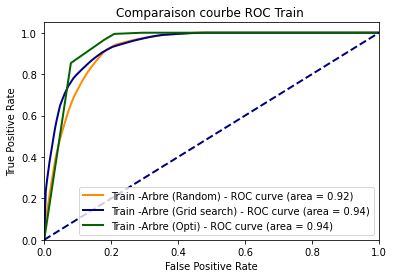

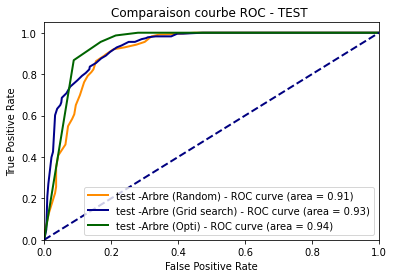

In [41]:
# Comparaison des 3 modèles
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
tree_random = DecisionTreeClassifier(**best_param_random_search)
tree_grid_search = DecisionTreeClassifier(**Grid_Search.best_params_)
tree_opti =  DecisionTreeClassifier(**opt.best_params_)

tree_random.fit(X_train,y_train)
fpr_train_random, tpr_train_random, thresholds_train_random = roc_curve(y_train, tree_random.predict_proba(X_train)[:,1])
roc_auc_train_random = auc(fpr_train_random, tpr_train_random)

tree_grid_search.fit(X_train,y_train)
fpr_train_grid_search, tpr_train_grid_search, thresholds_train_grid_search = roc_curve(y_train, tree_grid_search.predict_proba(X_train)[:,1])
roc_auc_train_grid_search = auc(fpr_train_grid_search, tpr_train_grid_search)

tree_opti.fit(X_train,y_train)
fpr_train_opti, tpr_train_opti, thresholds_train_opti = roc_curve(y_train, tree_opti.predict_proba(X_train)[:,1])
roc_auc_train_opti = auc(fpr_train_opti, tpr_train_opti)



plt.figure()
lw = 2
plt.plot(fpr_train_random, tpr_train_random, color='darkorange',
         lw=lw, label='Train -Arbre (Random) - ROC curve (area = %0.2f)' % roc_auc_train_random)

plt.plot(fpr_train_grid_search, tpr_train_grid_search, color='darkblue',
         lw=lw, label='Train -Arbre (Grid search) - ROC curve (area = %0.2f)' % roc_auc_train_grid_search)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courbe ROC Train ')
plt.legend(loc="lower right")
plt.show()


fpr_test_random, tpr_test_random, _ = roc_curve(y_test, tree_random.predict_proba(X_test)[:,1])
roc_auc_test_random = auc(fpr_test_random, tpr_test_random)

fpr_test_grid_search, tpr_test_grid_search, _ = roc_curve(y_test, tree_grid_search.predict_proba(X_test)[:,1])
roc_auc_test_grid_search = auc(fpr_test_grid_search, tpr_test_grid_search)

fpr_test_opti, tpr_test_opti, _ = roc_curve(y_test, tree_opti.predict_proba(X_test)[:,1])
roc_auc_test_opti = auc(fpr_test_opti, tpr_test_opti)


plt.figure()
lw = 2
plt.plot(fpr_test_random, tpr_test_random, color='darkorange',
         lw=lw, label='test -Arbre (Random) - ROC curve (area = %0.2f)' % roc_auc_test_random)

plt.plot(fpr_test_grid_search, tpr_test_grid_search, color='darkblue',
         lw=lw, label='test -Arbre (Grid search) - ROC curve (area = %0.2f)' % roc_auc_test_grid_search)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courbe ROC - TEST ')
plt.legend(loc="lower right")
plt.show()


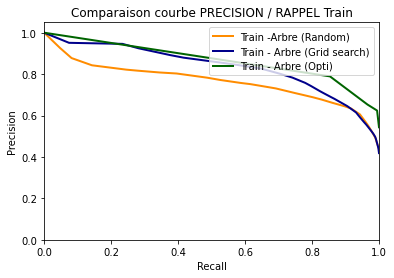

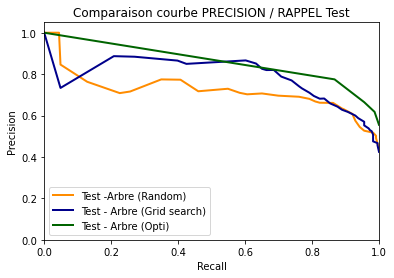

In [42]:
# Recherche sur le train

precision_train_random, recall_train_random, thresholds_train_random = precision_recall_curve(y_train,
                                                                         tree_random.predict_proba(X_train)[:,1])
precision_train_grid_search, recall_train_grid_search, thresholds_train_grid_search = precision_recall_curve(y_train,
                                                                         tree_grid_search.predict_proba(X_train)[:,1])


precision_train_opti, recall_train_opti, thresholds_train_opti = precision_recall_curve(y_train,
                                                                         tree_opti.predict_proba(X_train)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_random,precision_train_random, color='darkorange',
         lw=lw,  label='Train -Arbre (Random)')

plt.plot(recall_train_grid_search,precision_train_grid_search, color='darkblue',
         lw=lw, label='Train - Arbre (Grid search)')

plt.plot(recall_train_opti,precision_train_opti, color='darkgreen',
         lw=lw, label='Train - Arbre (Opti)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL Train')
plt.legend(loc="upper right")
plt.show()
# Vérification sur le test

precision_test_random, recall_test_random, thresholds_test_random = precision_recall_curve(y_test,
                                                                         tree_random.predict_proba(X_test)[:,1])
precision_test_grid_search, recall_test_grid_search, thresholds_test_grid_search = precision_recall_curve(y_test,
                                                                         tree_grid_search.predict_proba(X_test)[:,1])


precision_test_opti, recall_test_opti, thresholds_test_opti = precision_recall_curve(y_test,
                                                                         tree_opti.predict_proba(X_test)[:,1])

plt.figure()
lw = 2
plt.plot(recall_test_random,precision_test_random, color='darkorange',
         lw=lw,  label='Test -Arbre (Random)')

plt.plot(recall_test_grid_search,precision_test_grid_search, color='darkblue',
         lw=lw, label='Test - Arbre (Grid search)')

plt.plot(recall_test_opti,precision_test_opti, color='darkgreen',
         lw=lw, label='Test - Arbre (Opti)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL Test')
plt.legend(loc="lower left")
plt.show()

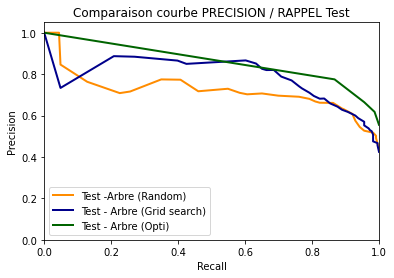

In [43]:
# Vérification sur le test

precision_test_random, recall_test_random, thresholds_test_random = precision_recall_curve(y_test,
                                                                         tree_random.predict_proba(X_test)[:,1])
precision_test_grid_search, recall_test_grid_search, thresholds_test_grid_search = precision_recall_curve(y_test,
                                                                         tree_grid_search.predict_proba(X_test)[:,1])


precision_test_opti, recall_test_opti, thresholds_test_opti = precision_recall_curve(y_test,
                                                                         tree_opti.predict_proba(X_test)[:,1])

plt.figure()
lw = 2
plt.plot(recall_test_random,precision_test_random, color='darkorange',
         lw=lw,  label='Test -Arbre (Random)')

plt.plot(recall_test_grid_search,precision_test_grid_search, color='darkblue',
         lw=lw, label='Test - Arbre (Grid search)')

plt.plot(recall_test_opti,precision_test_opti, color='darkgreen',
         lw=lw, label='Test - Arbre (Opti)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL Test')
plt.legend(loc="lower left")
plt.show()

## Regression logistique

In [44]:
from sklearn.linear_model import LogisticRegression


param_dict_bayes_elasticnet = {
    'penalty': Categorical(['elasticnet']), 
    'solver': Categorical(['saga']),
    'l1_ratio' : Real(0,0.99, prior='uniform'),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform')}

param_dict_bayes_l1 = {
    'penalty': Categorical(['l1']), 
    'solver': Categorical(['liblinear','saga']),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.9, prior='uniform')}

param_dict_bayes_l2 = {
    'penalty': Categorical(['l2']), 
    'solver': Categorical(['newton-cg', 'lbfgs','sag', 'saga']),
    'fit_intercept': Categorical([True,False]),
    'tol': Real(0,1, prior='uniform'),
    'C':Real(0,0.99, prior='uniform')}  


opt = BayesSearchCV(LogisticRegression(),[(param_dict_bayes_elasticnet,10),
                         (param_dict_bayes_l1,10),(param_dict_bayes_l2,10)],
                         cv=5,scoring = 'roc_auc')
                         
start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))



 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LA REGRESSION LOGISTIQUE #### 
 
 Durée de recherche en seconde :
2.811828499998228

 Paramètres optimaux : 
OrderedDict([('C', 0.7350085681725617), ('fit_intercept', True), ('penalty', 'l2'), ('solver', 'newton-cg'), ('tol', 0.29662593711489754)])

 Résultats  : 0.9642381556363091


In [45]:
reg_log = LogisticRegression()
reg_log.fit(X_train,y_train)
fpr_train_reg_log, tpr_train_reg_log, thresholds_train_reg_log = roc_curve(y_train, reg_log.predict_proba(X_train)[:,1])
roc_auc_train_reg_log = auc(fpr_train_reg_log, tpr_train_reg_log)
fpr_test_reg_log, tpr_test_reg_log, thresholds_test_reg_log = roc_curve(y_test, reg_log.predict_proba(X_test)[:,1])
roc_auc_test_reg_log = auc(fpr_test_reg_log, tpr_test_reg_log)

precision_train_reg_log, recall_train_reg_log, thresholds_train_reg_log = precision_recall_curve(y_train,
                                                                         reg_log.predict_proba(X_train)[:,1])
precision_test_reg_log, recall_test_reg_log, thresholds_test_reg_log = precision_recall_curve(y_test,
                                                                         reg_log.predict_proba(X_test)[:,1])

var_app=X.columns.tolist()
reg_log_non_norm = LogisticRegression(**opt.best_params_)
ref_log_non_norm = LogisticRegression()
reg_log_non_norm.fit(X_train,y_train)



LogisticRegression(C=0.7350085681725617, solver='newton-cg',
                   tol=0.29662593711489754)

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

param_dict_bayes_RF = {
    'n_estimators' : Integer(10,200),
    'criterion': Categorical(['gini', 'entropy']), 
    'max_depth': Integer(3,10),
    'bootstrap':Categorical([True,False])}

opt = BayesSearchCV(RandomForestClassifier(),param_dict_bayes_RF,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))



 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE RANDOM FOREST #### 
 
 Durée de recherche en seconde :
3.8480700999971305

 Paramètres optimaux : 
OrderedDict([('bootstrap', False), ('criterion', 'gini'), ('max_depth', 9), ('n_estimators', 109)])

 Résultats  : 0.9598930765728757


In [47]:
# Apprentissage du modèle

rf_clf = RandomForestClassifier(**opt.best_params_)

rf_clf.fit(X_train,y_train)
fpr_train_RF, tpr_train_RF, thresholds_train_RF = roc_curve(y_train, rf_clf.predict_proba(X_train)[:,1])
roc_auc_train_RF = auc(fpr_train_RF, tpr_train_RF)


fpr_test_RF, tpr_test_RF, thresholds_test_RF = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
roc_auc_test_RF = auc(fpr_test_RF, tpr_test_RF)
 
precision_train_RF, recall_train_RF, thresholds_train_RF = precision_recall_curve(y_train,
                                                                         rf_clf.predict_proba(X_train)[:,1])
precision_test_RF, recall_test_RF, thresholds_test_RF = precision_recall_curve(y_test,
                                                                         rf_clf.predict_proba(X_test)[:,1])




## Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier

param_dict_Bagging = {
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]), #RandomForestClassifier(n_estimators=10)]
    'n_estimators' : Integer(10,50),
    'bootstrap':Categorical([True,False]),
    'bootstrap_features':Categorical([False,True])}

NB_ITER = 3
opt = BayesSearchCV(BaggingClassifier(),param_dict_Bagging,n_iter=NB_ITER,cv=3,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE BAGGING #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))
bagging_clf = BaggingClassifier(**opt.best_params_)
bagging_clf.fit(X_train,y_train)                 


 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR LE BAGGING #### 
 
 Durée de recherche en seconde :
2.824508900001092

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('bootstrap', True), ('bootstrap_features', True), ('n_estimators', 34)])

 Résultats  : 0.9623537642685216


BaggingClassifier(base_estimator=LogisticRegression(), bootstrap_features=True,
                  n_estimators=34)

## Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

param_dict_AdaB = {
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'n_estimators' : Integer(10,50),
    'learning_rate' : Real(0.05,1, prior='uniform')}

opt = BayesSearchCV(AdaBoostClassifier(),param_dict_AdaB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR ADABOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))

ADB_clf = AdaBoostClassifier(**opt.best_params_)
ADB_clf.fit(X_train,y_train)

 #### RECHERCHE DES PARAMETRES OPTIMAUX POUR ADABOOST #### 
 
 Durée de recherche en seconde :
1.5747875999986718

 Paramètres optimaux : 
OrderedDict([('base_estimator', LogisticRegression()), ('learning_rate', 0.7416908321671757), ('n_estimators', 25)])

 Résultats  : 0.9510851524707814


AdaBoostClassifier(base_estimator=LogisticRegression(),
                   learning_rate=0.7416908321671757, n_estimators=25)

## XgBoost

In [50]:
#XGBOOST
import xgboost as xgb


param_dict_XGB = {
    'objective':Categorical(['binary:logistic']),
    'booster':Categorical(['gbtree']), #,'gblinear','dart'
    'base_estimator' : Categorical([LogisticRegression(),DecisionTreeClassifier()]),
    'learning_rate' : Real(0.05,1, prior='uniform'),
    'label' : X.columns.tolist()}

opt = BayesSearchCV(xgb.XGBClassifier(),param_dict_XGB,n_iter=NB_ITER,cv=5,scoring = 'roc_auc')

start = timer()  
opt.fit(X_train, y_train)
delais = timer()- start
best_param_opti_bayes =opt.best_params_
best_score_opti_bayes = opt.best_score_
all_result_opti_bayes = opt.cv_results_
print(" #### RECHERCHE DES PARAMETRES OPTIMAUX POUR XGBOOST #### ")
print(" \n Durée de recherche en seconde :")
print(delais)
print("\n Paramètres optimaux : ")
best_param_opti_bayes =opt.best_params_
print(best_param_opti_bayes)
best_score_opti_bayes = opt.best_score_
print("\n Résultats  : " + str(best_score_opti_bayes))


xgb_clf = xgb.XGBClassifier(**opt.best_params_)

xgb_clf.fit(X_train,y_train)

[05:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "base_estimator", "label" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "base_estimator", "label" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or

XGBClassifier(base_estimator=DecisionTreeClassifier(), base_score=0.5,
              booster='gbtree', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', label='ISCPHT_3.0',
              learning_rate=0.6836461258392659, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
from sklearn.ensemble import StackingClassifier

estimators = [('Ref_log',reg_log_non_norm), # J'utilise la regression avec les données brutes 
              ('RF', rf_clf),('ADA',ADB_clf),('XGB',xgb_clf),('Tree Opti',tree_opti),('Bagging',bagging_clf)]
param_stacking = {'cv':[5], 
                  'stack_method':['auto'], # Va appeler predict proba mais si l'algo n'a pas de fonctions predict proba retourne predict
                  'final_estimator':[LogisticRegression(),DecisionTreeClassifier()]}

start = timer()  
Grid_Search = GridSearchCV(StackingClassifier(estimators),param_stacking,scoring='roc_auc',cv=5)
Grid_Search.fit(X_train,y_train)
delais = timer()- start
print(" #### RECHERCHE GRID SEARCH #### ")
print(" \n Durée de recherche en minute :")
print(delais/60)
print("\n Paramètres grid search : ")
best_param_gid_search = Grid_Search.best_params_
print(best_param_gid_search)
best_score_grid_search = Grid_Search.best_score_
print("\n Résultats grid search  : " + str(best_score_grid_search))
stack_clf = StackingClassifier(estimators,**best_param_gid_search)
stack_clf.fit(X_train,y_train)

[05:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "base_estimator", "label" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:18:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "base_estimator", "label" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or

StackingClassifier(cv=5,
                   estimators=[('Ref_log',
                                LogisticRegression(C=0.7350085681725617,
                                                   solver='newton-cg',
                                                   tol=0.29662593711489754)),
                               ('RF',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=9,
                                                       n_estimators=109)),
                               ('ADA',
                                AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                   learning_rate=0.7416908321671757,
                                                   n_estimators=25)),
                               ('XGB',
                                XGBClassifier(base_est...
                                              subsample=1, tree_method='exact'

# Comparaison de tous les modèles

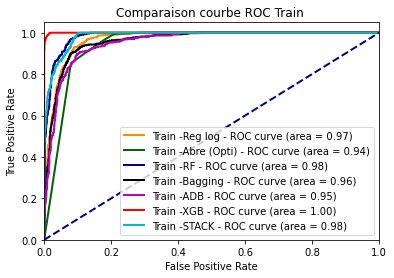

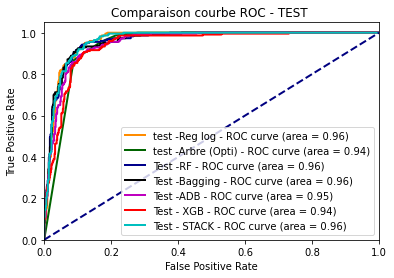

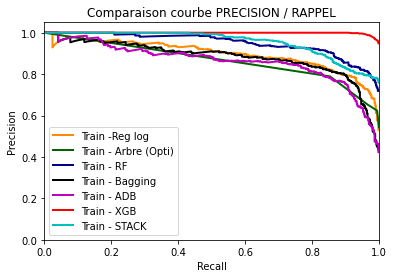

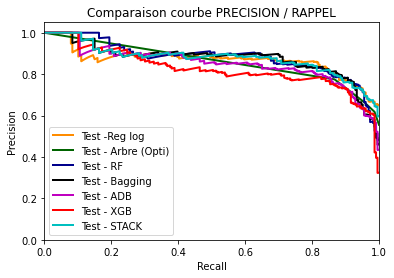

In [52]:

#Calcul des métriques
fpr_train_Bag, tpr_train_Bag, thresholds_train_Bag = roc_curve(y_train, bagging_clf.predict_proba(X_train)[:,1])
roc_auc_train_Bag = auc(fpr_train_Bag, tpr_train_Bag)


fpr_train_ADB, tpr_train_ADB, thresholds_train_ADB = roc_curve(y_train, ADB_clf.predict_proba(X_train)[:,1])
roc_auc_train_ADB = auc(fpr_train_ADB, tpr_train_ADB)

fpr_train_XGB, tpr_train_XGB, thresholds_train_XGB = roc_curve(y_train, xgb_clf.predict_proba(X_train)[:,1])
roc_auc_train_XGB = auc(fpr_train_XGB, tpr_train_XGB)

fpr_train_STACK, tpr_train_STACK, thresholds_train_STACK = roc_curve(y_train, stack_clf.predict_proba(X_train)[:,1])
roc_auc_train_STACK = auc(fpr_train_STACK, tpr_train_STACK)




plt.figure()
lw = 2
plt.plot(fpr_train_reg_log, tpr_train_reg_log, color='darkorange',
         lw=lw, label='Train -Reg log - ROC curve (area = %0.2f)' % roc_auc_train_reg_log)

plt.plot(fpr_train_opti, tpr_train_opti, color='darkgreen',
         lw=lw, label='Train -Abre (Opti) - ROC curve (area = %0.2f)' % roc_auc_train_opti)

plt.plot(fpr_train_RF, tpr_train_RF, color='darkblue',
         lw=lw, label='Train -RF - ROC curve (area = %0.2f)' % roc_auc_train_RF)

plt.plot(fpr_train_Bag, tpr_train_Bag, color='k',
         lw=lw, label='Train -Bagging - ROC curve (area = %0.2f)' % roc_auc_train_Bag)

plt.plot(fpr_train_ADB, tpr_train_ADB, color='m',
         lw=lw, label='Train -ADB - ROC curve (area = %0.2f)' % roc_auc_train_ADB)

plt.plot(fpr_train_XGB, tpr_train_XGB, color='r',
         lw=lw, label='Train -XGB - ROC curve (area = %0.2f)' % roc_auc_train_XGB)

plt.plot(fpr_train_STACK, tpr_train_STACK, color='c',
         lw=lw, label='Train -STACK - ROC curve (area = %0.2f)' % roc_auc_train_STACK)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courbe ROC Train ')
plt.legend(loc="lower right")
plt.show()


fpr_test_Bag, tpr_test_Bag, thresholds_test_Bag = roc_curve(y_test, bagging_clf.predict_proba(X_test)[:,1])
roc_auc_test_Bag = auc(fpr_test_Bag, tpr_test_Bag)

fpr_test_ADB, tpr_test_ADB, thresholds_test_ADB = roc_curve(y_test, ADB_clf.predict_proba(X_test)[:,1])
roc_auc_test_ADB = auc(fpr_test_ADB, tpr_test_ADB)

fpr_test_XGB, tpr_test_XGB, thresholds_test_XGB = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)

fpr_test_STACK, tpr_test_STACK, thresholds_test_STACK = roc_curve(y_test, stack_clf.predict_proba(X_test)[:,1])
roc_auc_test_STACK = auc(fpr_test_STACK, tpr_test_STACK)


plt.figure()
lw = 2
plt.plot(fpr_test_reg_log, tpr_test_reg_log, color='darkorange',
         lw=lw, label='test -Reg log - ROC curve (area = %0.2f)' % roc_auc_test_reg_log)

plt.plot(fpr_test_opti, tpr_test_opti, color='darkgreen',
         lw=lw, label='test -Arbre (Opti) - ROC curve (area = %0.2f)' % roc_auc_test_opti)

plt.plot(fpr_test_RF, tpr_test_RF, color='darkblue',
         lw=lw, label='Test -RF - ROC curve (area = %0.2f)' % roc_auc_test_RF)

plt.plot(fpr_test_Bag, tpr_test_Bag, color='k',
         lw=lw, label='Test -Bagging - ROC curve (area = %0.2f)' % roc_auc_test_Bag)

plt.plot(fpr_test_ADB, tpr_test_ADB, color='m',
         lw=lw, label='Test -ADB - ROC curve (area = %0.2f)' % roc_auc_test_ADB)

plt.plot(fpr_test_XGB, tpr_test_XGB, color='r',
         lw=lw, label='Test - XGB - ROC curve (area = %0.2f)' % roc_auc_test_XGB)

plt.plot(fpr_test_STACK, tpr_test_STACK, color='c',
         lw=lw, label='Test - STACK - ROC curve (area = %0.2f)' % roc_auc_test_STACK)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparaison courbe ROC - TEST ')
plt.legend(loc="lower right")
plt.show()



### COURBES PRECISION RAPPEL


precision_train_Bag, recall_train_Bag, thresholds_train_Bag = precision_recall_curve(y_train,
                                                                         bagging_clf.predict_proba(X_train)[:,1])


precision_train_ADB, recall_train_ADB, thresholds_train_ADB = precision_recall_curve(y_train,
                                                                         ADB_clf.predict_proba(X_train)[:,1])

precision_train_XGB, recall_train_XGB, thresholds_train_XGB = precision_recall_curve(y_train,
                                                                         xgb_clf.predict_proba(X_train)[:,1])


precision_train_STACK, recall_train_STACK, thresholds_train_STACK = precision_recall_curve(y_train,
                                                                         stack_clf.predict_proba(X_train)[:,1])

plt.figure()
lw = 2
plt.plot(recall_train_reg_log,precision_train_reg_log, color='darkorange',
         lw=lw,  label='Train -Reg log')

plt.plot(recall_train_opti,precision_train_opti, color='darkgreen',
         lw=lw, label='Train - Arbre (Opti)')


plt.plot(recall_train_RF,precision_train_RF, color='darkblue',
         lw=lw, label='Train - RF')

plt.plot(recall_train_Bag,precision_train_Bag, color='k',
         lw=lw, label='Train - Bagging')

plt.plot(recall_train_ADB,precision_train_ADB, color='m',
         lw=lw, label='Train - ADB')

plt.plot(recall_train_XGB,precision_train_XGB, color='r',
         lw=lw, label='Train - XGB')


plt.plot(recall_train_STACK,precision_train_STACK, color='c',
         lw=lw, label='Train - STACK')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()


# Vérification sur le test

precision_test_Bag, recall_test_Bag, thresholds_test_Bag = precision_recall_curve(y_test,
                                                                         bagging_clf.predict_proba(X_test)[:,1])

precision_test_ADB, recall_test_ADB, thresholds_test_ADB = precision_recall_curve(y_test,
                                                                         ADB_clf.predict_proba(X_test)[:,1])

precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(y_test,
                                                                         xgb_clf.predict_proba(X_test)[:,1])

precision_test_STACK, recall_test_STACK, thresholds_test_STACK = precision_recall_curve(y_test,
                                                                         stack_clf.predict_proba(X_test)[:,1])

plt.figure()
lw = 2
plt.plot(recall_test_reg_log,precision_test_reg_log, color='darkorange',
         lw=lw,  label='Test -Reg log')

plt.plot(recall_test_opti,precision_test_opti, color='darkgreen',
         lw=lw, label='Test - Arbre (Opti)')

plt.plot(recall_test_RF,precision_test_RF, color='darkblue',
         lw=lw, label='Test - RF')

plt.plot(recall_test_Bag,precision_test_Bag, color='k',
         lw=lw, label='Test - Bagging')

plt.plot(recall_test_ADB,precision_test_ADB, color='m',
         lw=lw, label='Test - ADB')

plt.plot(recall_test_XGB,precision_test_XGB, color='r',
         lw=lw, label='Test - XGB')


plt.plot(recall_test_STACK,precision_test_STACK, color='c',
         lw=lw, label='Test - STACK')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

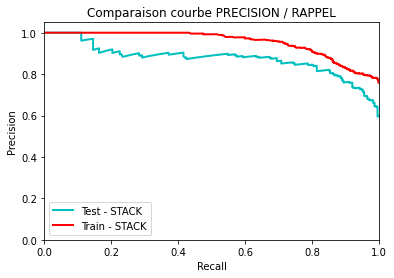

In [53]:
plt.plot(recall_test_STACK,precision_test_STACK, color='c',
         lw=lw, label='Test - STACK')
plt.plot(recall_train_STACK,precision_train_STACK, color='r',
         lw=lw, label='Train - STACK')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparaison courbe PRECISION / RAPPEL')
plt.legend(loc="lower left")
plt.show()

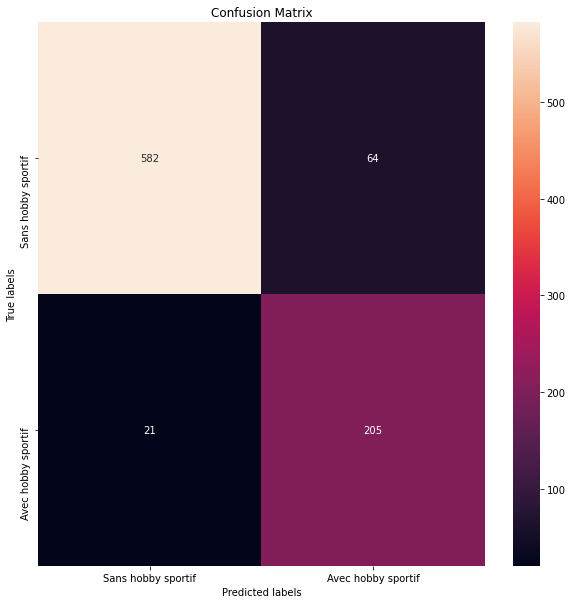

<Figure size 1152x720 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(10,10))
plt.figure(figsize=(16,10))
pred=stack_clf.predict_proba(X_test)[:,1]
cm=confusion_matrix(y_test,pred>0.2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Sans hobby sportif', 'Avec hobby sportif']); ax.yaxis.set_ticklabels(['Sans hobby sportif', 'Avec hobby sportif']);

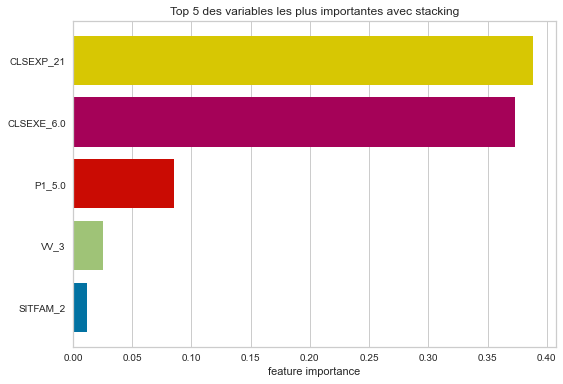

<AxesSubplot:title={'center':'Top 5 des variables les plus importantes avec stacking'}, xlabel='feature importance'>

In [88]:
from yellowbrick.model_selection import feature_importances
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(stack_clf, relative=False, topn=5,title="Top 5 des variables les plus importantes avec stacking")

# Fit and show the feature importances
viz.fit(X, y)
viz.show()